## PROJET DEMAND FORCASTING

In [1]:
# Importation des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#modif testiedje

In [2]:
data1=pd.read_csv("/Users/engenouadje/Downloads/archive-3/olist_customers_dataset.csv")
data1=data1.dropna()
display(data1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
# Compter le nombre de clients par État
state_counts = data1["customer_state"].value_counts().reset_index()

# Créer le graphique à barres interactif
fig = px.bar(state_counts, x="index", y="customer_state", labels={"index": "État", "customer_state": "Nombre de clients"})
fig.update_layout(title="Répartition des clients par État")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['customer_state', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

In [4]:
# Compter le nombre de clients par ville
city_counts = data1["customer_city"].value_counts().reset_index()

# Créer le diagramme circulaire interactif
fig = px.pie(city_counts, names="index", values="customer_city", title="Répartition des clients par ville")
fig.show()

In [5]:
# Extraire les 2 premiers chiffres des codes postaux
data1["zipcode_prefix"] = data1["customer_zip_code_prefix"].astype(str).str[:2]

# Compter le nombre de clients dans chaque plage de codes postaux
zipcode_counts = data1["zipcode_prefix"].value_counts().reset_index()

# Créer l'histogramme interactif
fig = px.bar(zipcode_counts, x="index", y="zipcode_prefix", labels={"index": "Plage de codes postaux", "zipcode_prefix": "Nombre de clients"})
fig.update_layout(title="Répartition des clients par codes postaux")
fig.show()

In [4]:
# Compter le nombre de clients uniques
unique_customers = data1["customer_unique_id"].nunique()
repeated_customers = len(data1) - unique_customers

# Créer le diagramme circulaire interactif
labels = ["Clients uniques", "Clients répétés"]
values = [unique_customers, repeated_customers]
fig = px.pie(names=labels, values=values, title="Répartition des clients uniques")
fig.show()

In [7]:
#supression des lignes vides 
#merged_data.dropna()

In [3]:
#Estimation des ventes mensuels pour 2020
#order_items = pd.read_csv("/Users/engenouadje/Downloads/archive-3/olist_order_items_dataset.csv")
orders = pd.read_csv("/Users/engenouadje/Downloads/archive-3/olist_orders_dataset.csv")
# Fusionner les DataFrames




In [7]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [4]:
colonnes_gardees=["order_status","order_purchase_timestamp"]

In [5]:
#les donnees qui seront utiles :
merged_data=orders[colonnes_gardees]
# utilisation des donnees possedant delivred 
merged_data = merged_data[merged_data['order_status'].str.contains('delivered')]
merged_data['order_status'] = merged_data['order_status'].replace("delivered", 1)

In [10]:
merged_data

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27


In [66]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_status              96478 non-null  int64 
 1   order_purchase_timestamp  96478 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [6]:
#conversion de la colonne des dates en datetime
from datetime import datetime
merged_data["order_purchase_timestamp"] = pd.to_datetime(merged_data["order_purchase_timestamp"]).dt.date
merged_data["order_purchase_timestamp"] = pd.to_datetime(merged_data["order_purchase_timestamp"])

merged_data.info()
merged_data

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_status              96478 non-null  int64         
 1   order_purchase_timestamp  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB


,order_status,order_purchase_timestamp
0,1,2017-10-02
1,1,2018-07-24
2,1,2018-08-08
3,1,2017-11-18
4,1,2018-02-13
...,...,...
99436,1,2017-03-09
99437,1,2018-02-06
99438,1,2017-08-27
99439,1,2018-01-08


In [7]:
# j'index mes donnees par la colonne de timestampabs

merged_data.sort_values(by='order_purchase_timestamp',inplace=True)
merged_data.set_index('order_purchase_timestamp',inplace=True)
display(merged_data)


,order_status
order_purchase_timestamp,
2016-09-15,1
2016-10-03,1
2016-10-03,1
2016-10-03,1
2016-10-03,1
...,...
2018-08-29,1
2018-08-29,1
2018-08-29,1


In [8]:

# Extraire l'année et le mois à partir de la colonne "order_purchase_timestamp"
# merged_data['annee'] = merged_data['order_purchase_timestamp'].dt.year
# merged_data['mois'] = merged_data['order_purchase_timestamp'].dt.month
# merged_data['jour'] = merged_data['order_purchase_timestamp'].dt.day
# #verification des valeurs manquante
# merged_data.isnull().sum()

KeyError: 'order_purchase_timestamp'

In [8]:
#je commence par faire une analyse de donnnees et pour cela 
# je commence par faire une courbe montrant la trajectoire du nombre de livraison effectue par mois
#c'est l'etape 1 du model Arima qui consiste a analyser les donnees 
# Effectuer l'agrégation par année et mois et compter le nombre total de commandes par année et mois
#commandes_par_annee_mois = merged_data.groupby(['annee', 'mois','jour'])
#commandes_par_annee_mois_jour= merged_data.groupby(['order_purchase_timestamp'])

ventes_totales_par_jour = merged_data.groupby('order_purchase_timestamp')['order_status'].sum()
test=merged_data.groupby('order_purchase_timestamp').size().reset_index(name='Ventes')
display(test)
# Tracer la courbe de l'évolution du nombre total de commandes par année et mois
#commandes_par_annee_mois.plot(kind='line', figsize=(10, 6))
# plt.title("Évolution du nombre total de commandes par année et mois")
# plt.xlabel("Année et mois")
# plt.ylabel("Nombre total de commandes")
# plt.grid(True)
# plt.show()

,order_purchase_timestamp,Ventes
0,2016-09-15,1
1,2016-10-03,7
2,2016-10-04,54
3,2016-10-05,35
4,2016-10-06,41
...,...,...
607,2018-08-25,69
608,2018-08-26,73
609,2018-08-27,66
610,2018-08-28,39


In [9]:
import plotly.express as px


fig = px.line(test, x="order_purchase_timestamp", y="Ventes" ,title='Ventes par jours')
fig.show()

In [78]:
# Compter le nombre de mois de données uniques
nombre_mois = merged_data.groupby(['mois', 'annee']).size().shape[0]

print("Nombre de mois de données :", nombre_mois)

Nombre de mois de données : 23


In [94]:
!pip install statsmodels

,Ventes
order_purchase_timestamp,
2016-09-15,1
2016-10-03,7
2016-10-04,54
2016-10-05,35
2016-10-06,41
...,...
2018-08-25,69
2018-08-26,73
2018-08-27,66


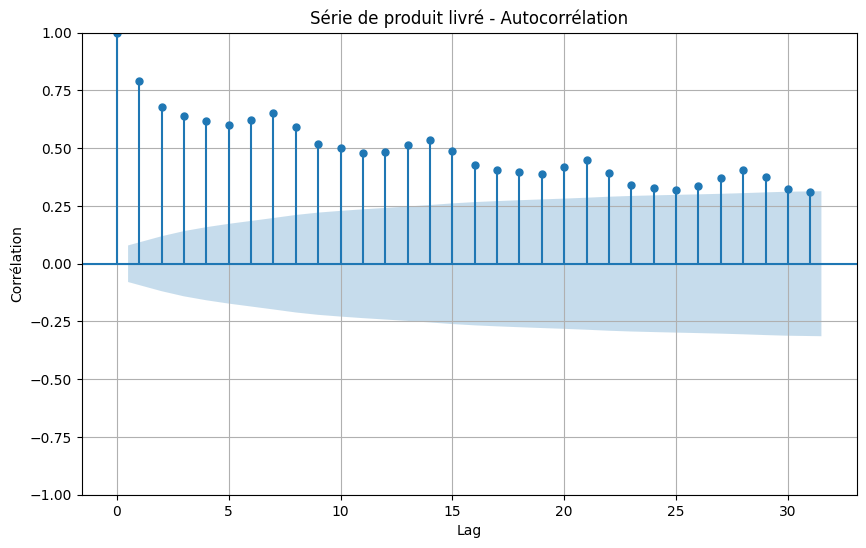

In [10]:
# l'ACF(Auto Corelation Fonction) et le PACF(Partial Autocorelation Fonction) sont deux outils tres importants dans
#l'analyse des series temporelle.Elle permet de comprendre les dependences temporelles dans une serie de donnees 
test2=test.set_index('order_purchase_timestamp')
display(test2)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Tracer la fonction d'autocorrélation (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(test2, lags=31, zero=True, ax=ax)  # Ajuster le nombre de lags à 23
ax.set_title('Série de produit livré - Autocorrélation')
ax.set_xlabel('Lag')
ax.set_ylabel('Corrélation')
plt.grid(True)
plt.show()


In [ ]:
# cet ACF precedent montre que la serie n'est pas stationnaire car on observe une decroissance reguliere 
#On aurait pu aussi utiliser le test de Dickey fuller pour cela on devait voir avec la p-valeur que la serie n'est pas stationnaire 

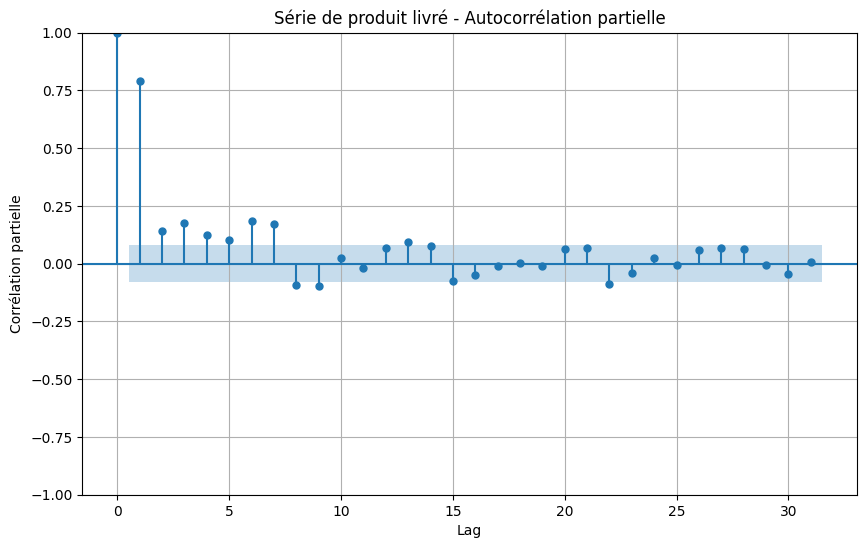

In [12]:

# Effectuer l'agrégation par mois et année et compter le nombre de commandes pour chaque combinaison mois/année
commandes_par_mois_annee =test2

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Tracer la fonction d'autocorrélation partielle (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(commandes_par_mois_annee, lags=31, zero=True, ax=ax)  # Ajuster le nombre de lags à 11
ax.set_title('Série de produit livré - Autocorrélation partielle')
ax.set_xlabel('Lag')
ax.set_ylabel('Corrélation partielle')
plt.grid(True)
plt.show()

In [15]:
# Différenciation pour rendre la série stationnaire
differenced = commandes_par_mois_annee['Ventes'].diff().dropna()
display(differenced)
differenced=differenced.reset_index(name="Difference")
display(differenced)
#Afficher la série différienciée

import plotly.express as px


fig = px.line(differenced, x="order_purchase_timestamp", y="Difference" ,title='Série différencié')
fig.show()

NameError: name 'commandes_par_mois_annee' is not defined

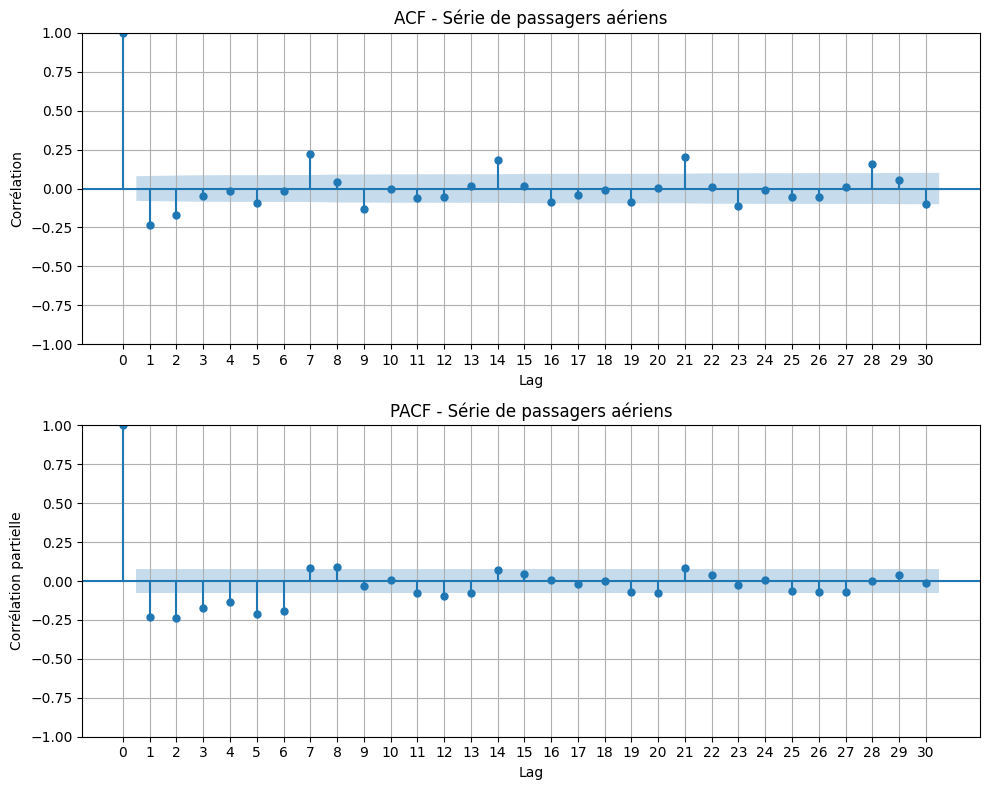

In [109]:
import numpy as np
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [112]:

p=1
q=2
d=1

display(commandes_par_mois_annee)
#print(611-63)

,Ventes
order_purchase_timestamp,
2016-09-15,1
2016-10-03,7
2016-10-04,54
2016-10-05,35
2016-10-06,41
...,...
2018-08-25,69
2018-08-26,73
2018-08-27,66


In [19]:
#separer les donnees en ensemble d'entrainement train et de test
train_data = commandes_par_mois_annee['Ventes'][:-63]
train_data.index = pd.to_datetime(train_data.index)
index_to_remove = train_data.idxmax()
train_data.drop(index_to_remove, inplace=True)
#train_data.index=train_data.index.date
display(train_data)
#train_data['Ventes'] = train_data['Ventes'].astype(str)
#train_data[['DATE', 'VENTE']] = train_data['Ventes'].str.split(' ', 1, expand=True)


test_data = commandes_par_mois_annee['Ventes'][-63:]
test_data.index = pd.to_datetime(test_data.index)
#test_data.index=test_data.index.date



from statsmodels.tsa.arima.model import ARIMA
# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(1,1,1))
# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle

print (model_fit.summary())

order_purchase_timestamp
2016-09-15      1
2016-10-03      7
2016-10-04     54
2016-10-05     35
2016-10-06     41
             ... 
2018-06-23    149
2018-06-24    198
2018-06-25    238
2018-06-26    238
2018-06-27    214
Name: Ventes, Length: 548, dtype: int64

/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                 Ventes   No. Observations:                  548
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2697.433
Date:                Sun, 30 Jul 2023   AIC                           5400.866
Time:                        17:53:24   BIC                           5413.779
Sample:                             0   HQIC                          5405.913
                                - 548                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597      0.036     18.560      0.000       0.590       0.729
ma.L1         -0.9512      0.015    -61.518      0.000      -0.981      -0.921
sigma2      1122.1115     35.724     31.411      0.0

<Figure size 1000x500 with 0 Axes>

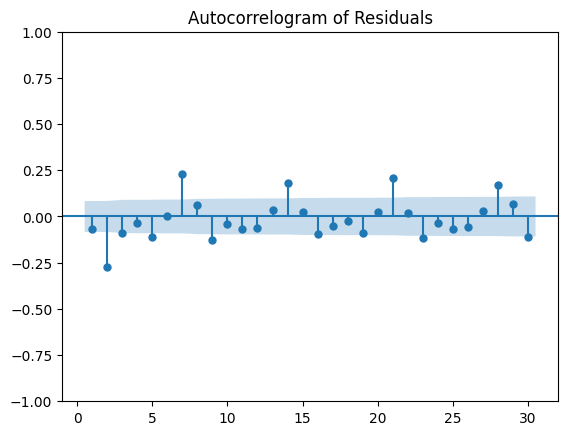

<Figure size 1000x500 with 0 Axes>

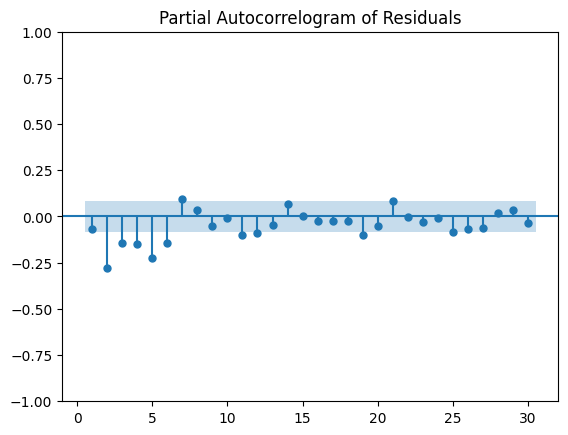

In [122]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,predicted_mean
Date,
2016-09-15,0.000000
2016-10-03,0.999785
2016-10-04,5.996953
2016-10-05,44.174992
2016-10-06,30.430905
...,...
2018-06-23,185.365371
2018-06-24,165.118870
2018-06-25,199.048586


/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,predicted_mean
549,209.600422
550,208.446822
551,207.685812
552,207.183788
553,206.852612
...,...
607,206.210651
608,206.210651
609,206.210651
610,206.210651


,predicted_mean
Date,
2018-06-28,209.600422
2018-06-29,208.446822
2018-06-30,207.685812
2018-07-01,207.183788
2018-07-02,206.852612
...,...
2018-08-25,206.210651
2018-08-26,206.210651
2018-08-27,206.210651


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

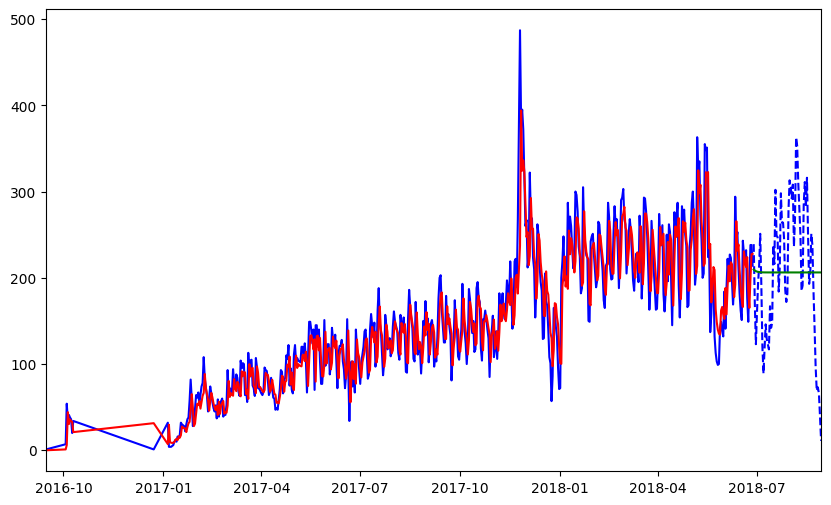

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
# Prédictions sur l'ensemble d'entraînement

train_data = commandes_par_mois_annee['Ventes'][:-63]
index_to_remove = train_data.idxmax()
train_data.drop(index_to_remove, inplace=True)
train_data.index = pd.to_datetime(train_data.index)

train_data.index=train_data.index.date
train_data=pd.DataFrame(train_data)
train_data.reset_index(inplace=True)
#display(train_data)

#train_data['Ventes'] = train_data['Ventes'].astype(str)
#train_data[['DATE', 'VENTE']] = train_data['Ventes'].str.split(' ', 1, expand=True)


test_data = commandes_par_mois_annee['Ventes'][-63:]
test_data.index = pd.to_datetime(test_data.index)
test_data.index=test_data.index.date
test_data=pd.DataFrame(test_data)
test_data.reset_index(inplace=True)

#display(test_data)

#display(train_data['2016-10-03 00:00:00'])
#display(test_data)
#display(train_data)
train_data.rename(columns={'index': 'Date'}, inplace=True)
test_data.rename(columns={'index': 'Date'}, inplace=True)

#test_data.set_index('Date',inplace=True)
#train_data.set_index('Date',inplace=True)
#display(test_data)

# date_str = '2016-10-03 00:00:00'

# # Format de la chaîne de caractères
# format_str = '%Y-%m-%d %H:%M:%S'

# # Convertir en objet datetime
# date_obj = datetime.strptime(date_str, format_str)

# date_str = '2018-06-27 00:00:00'

# # Format de la chaîne de caractères
# format_str = '%Y-%m-%d %H:%M:%S'

# # Convertir en objet datetime
# date_obj2 = datetime.strptime(date_str, format_str)

# date_str = '2018-06-28 00:00:00'

# # Format de la chaîne de caractères
# format_str = '%Y-%m-%d %H:%M:%S'

# # Convertir en objet datetime
# date_obj3 = datetime.strptime(date_str, format_str)

# date_str = '2018-08-29 00:00:00'

# # Format de la chaîne de caractères
# format_str = '%Y-%m-%d %H:%M:%S'

# # Convertir en objet datetime
# date_obj4 = datetime.strptime(date_str, format_str)

train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

#Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=549, end=611)


#test_predictions=pd.DataFrame(test_predictions)
#test_predictions.reset_index(inplace=True)
#test_predictions.rename(columns={'index': 'Date', 0: 'predicted_mean'}, inplace=True)
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])
train_predictions=pd.DataFrame(train_predictions)
train_predictions_mean = train_predictions.predicted_mean

train_predictions_df = pd.DataFrame(train_predictions_mean, columns=['predicted_mean'])
train_predictions_df['Date']=train_predictions_df.index

train_predictions_df['Date'] = train_data['Date'].values
train_predictions_df.set_index('Date', inplace=True)
display(train_predictions_df)
# # # # Prédictions sur l'ensemble de test

test_predictions = model_fit.predict(start=549, end=611)
test_predictions=pd.DataFrame(test_predictions)
test_predictions_mean = test_predictions.predicted_mean

test_predictions_df = pd.DataFrame(test_predictions_mean, columns=['predicted_mean'])
display(test_predictions_df)


test_predictions_df['Date'] = test_data['Date'].values
test_predictions_df.set_index('Date', inplace=True)
display(test_predictions_df)







train_data.set_index('Date',inplace=True)
test_data.set_index('Date',inplace=True)


#display(test_predictions)
#display(train_data)
#

#Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.Ventes, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.Ventes, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions_df.index, train_predictions_df, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions_df.index, test_predictions_df, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()


In [ ]:
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test

train_data = commandes_par_mois_annee['Ventes'][:-30]
index_to_remove = train_data.idxmax()
train_data.drop(index_to_remove, inplace=True)
index_to_remove = train_data.idxmax()
train_data.drop(index_to_remove, inplace=True)





test_data = commandes_par_mois_annee['Ventes'][-30:]
#test_data.index = pd.to_datetime(test_data.index)
#test_data.index=test_data.index.date

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())
#modif

In [16]:
#display(train_data)
import pandas as pd

# Supposons que vous ayez déjà créé votre dataframe 'df'

# Convertir l'index en format de date si ce n'est pas déjà le cas
train_data.index = pd.to_datetime(train_data.index)

# Définir la date à partir de laquelle vous souhaitez afficher les données
start_date = '2017-01-01'

# Filtrer les lignes à partir de la date spécifiée
data_a_partir_de_date = train_data[train_data.index >= start_date]

# Afficher les données à partir de la date spécifiée
print(data_a_partir_de_date)


order_purchase_timestamp
2017-01-05     32
2017-01-06      4
2017-01-07      4
2017-01-08      4
2017-01-09      5
             ... 
2018-07-26    244
2018-07-27    186
2018-07-28    172
2018-07-29    182
2018-07-30    278
Name: Ventes, Length: 570, dtype: int64


/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


order_purchase_timestamp
2018-07-31    269.928413
2018-08-01    257.102475
2018-08-02    247.939455
2018-08-03    216.034554
2018-08-04    188.255664
2018-08-05    213.953538
2018-08-06    257.238416
2018-08-07    264.504374
2018-08-08    255.717282
2018-08-09    246.654329
2018-08-10    215.263114
2018-08-11    189.567646
2018-08-12    215.484721
2018-08-13    257.022850
2018-08-14    263.874899
2018-08-15    255.410639
2018-08-16    245.640593
2018-08-17    214.626750
2018-08-18    190.883726
2018-08-19    216.942321
2018-08-20    256.804924
2018-08-21    263.270686
2018-08-22    255.078623
2018-08-23    244.643970
2018-08-24    214.062188
2018-08-25    192.187967
2018-08-26    218.326805
2018-08-27    256.584759
2018-08-28    262.689096
2018-08-29    254.722938
dtype: float64

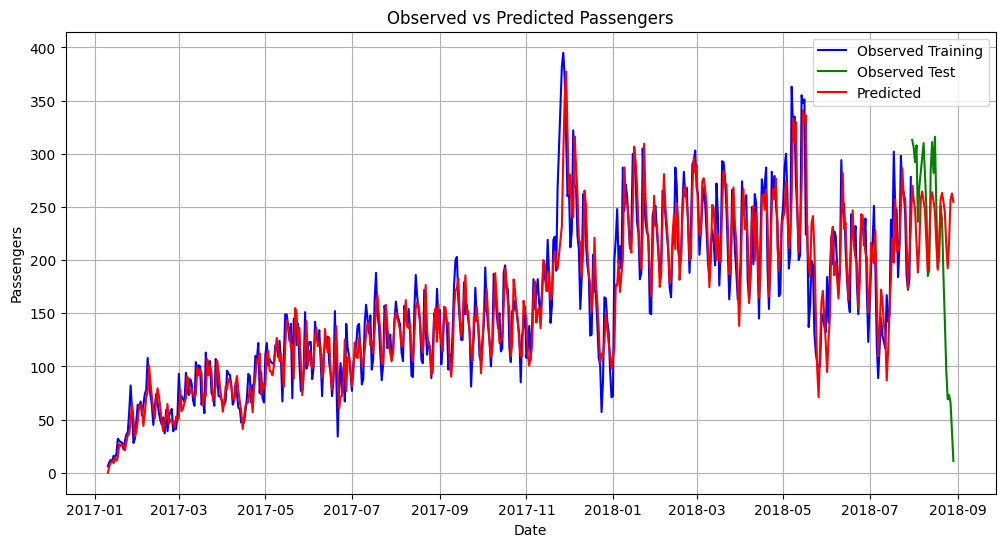

In [21]:
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
predicted.index=test_data.index
display(predicted)
# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
index_to_remove = test_data.idxmax()
test_data.drop(index_to_remove, inplace=True)
index_to_remove = test_data.idxmax()
test_data.drop(index_to_remove, inplace=True)



plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


## Données video 

In [22]:
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
df=pd.read_csv("/Users/engenouadje/Desktop/Stage Stive/AirPassengers.csv")
df.rename(columns={'#Passengers':'Passengers'},inplace=True)
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df.set_index('Month',inplace=True)

train_data = df['Passengers'][:-15]






test_data = df['Passengers'][-15:]
#test_data.index = pd.to_datetime(test_data.index)
#test_data.index=test_data.index.date

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())
#modif

/var/folders/x3/q7_rm0gn54db09dyjz_5xgtr0000gn/T/ipykernel_920/3080182738.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -589.217
Date:                Sun, 30 Jul 2023   AIC                           1190.435
Time:                        17:56:24   BIC                           1207.547
Sample:                    01-01-1949   HQIC                          1197.388
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6605      0.126      5.242      0.000       0.414       0.907
ar.L1          1.6235      0.041     39.786      0.000       1.543       1.703
ar.L2         -0.8951      0.041    -21.902      0.0

Month
1959-10-01    398.417838
1959-11-01    349.818456
1959-12-01    329.385705
1960-01-01    340.374591
1960-02-01    377.164009
1960-03-01    427.714824
1960-04-01    477.513284
1960-05-01    513.772815
1960-06-01    528.725823
1960-07-01    521.206886
1960-08-01    496.276578
1960-09-01    463.193690
1960-10-01    432.459917
1960-11-01    412.837029
1960-12-01    409.149601
dtype: float64

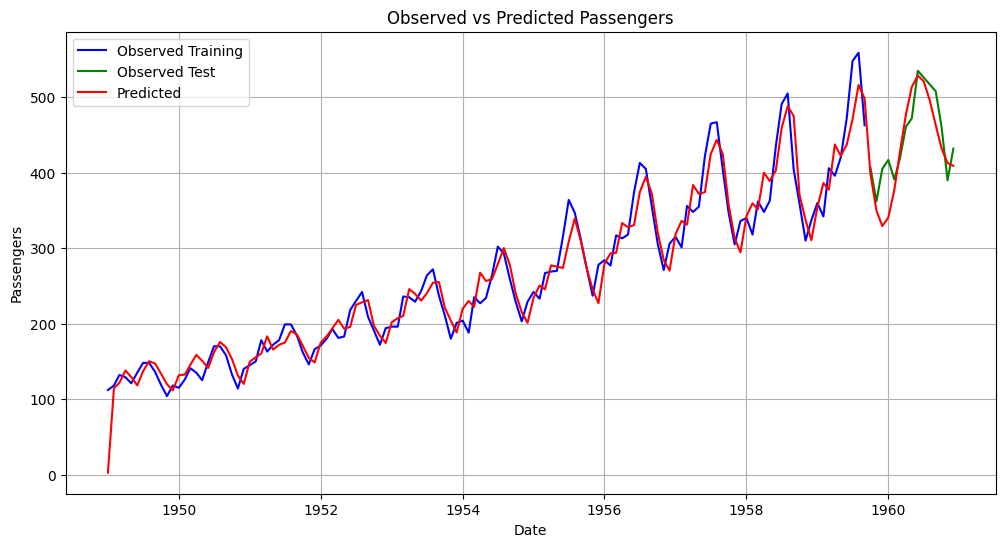

In [23]:
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
predicted.index=test_data.index
display(predicted)
# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
index_to_remove = test_data.idxmax()
test_data.drop(index_to_remove, inplace=True)
index_to_remove = test_data.idxmax()
test_data.drop(index_to_remove, inplace=True)



plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


## Données Janvier - Avril

In [54]:

import pandas as pd
train_data = commandes_par_mois_annee['Ventes'][:-30]
test_data = commandes_par_mois_annee['Ventes'][-30:]
# Supposons que vous ayez déjà créé votre dataframe 'df'

# Convertir l'index en format de date si ce n'est pas déjà le cas
#train_data.index = pd.to_datetime(train_data.index)

# Définir l'intervalle de dates à supprimer
start_date ='2017-01-01'
end_date ='2017-04-27'

# Filtrer les lignes en dehors de l'intervalle de dates à supprimer
train_data1 = train_data[(train_data.index > start_date) & (train_data.index < end_date)]
test_data1 = test_data[(test_data.index > start_date) & (test_data.index < end_date)]
# Afficher le dataframe résultant


start_date ='2018-01-01'
end_date ='2018-04-27'

train_data2 = train_data[(train_data.index > start_date) & (train_data.index < end_date)]
test_data2 = test_data[(test_data.index > start_date) & (test_data.index < end_date)]
#print(len())

train_data = pd.concat([train_data1, train_data2])
test_data = pd.concat([test_data1, test_data2])
model= pm.auto_arima(train_data)
display(test_data)

Series([], Name: Ventes, dtype: int64)

In [37]:
date_range = pd.date_range(start='2018-04-28', end='2018-07-28', freq='D')
print(len(date_range))

92


/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/engenouadje/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



2019-01-01    189.373960
2019-01-02    156.527413
2019-01-03    221.198696
2019-01-04    265.844013
2019-01-05    260.484758
                 ...    
2019-04-23    313.251158
2019-04-24    311.545305
2019-04-25    303.860455
2019-04-26    310.247272
2019-04-27    344.007023
Freq: D, Length: 117, dtype: float64

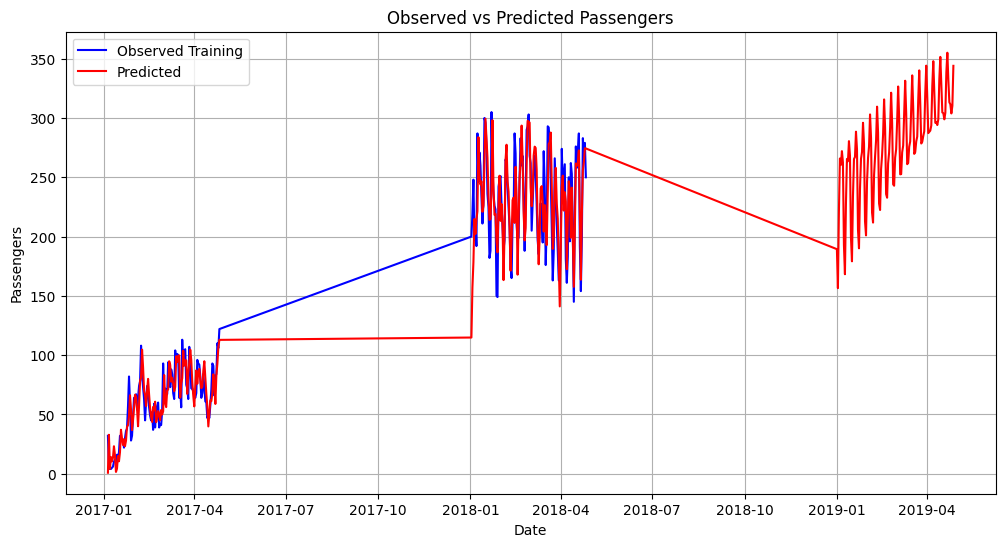

In [56]:
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)


# Créer un intervalle de dates du 23 août 2018 au 23 août 2019 (vous pouvez ajuster la plage de dates selon vos besoins)
date_range = pd.date_range(start='2019-01-01', end='2019-04-27', freq='D')
len(date_range)
# Créer un dataframe avec des valeurs vides et utiliser l'intervalle de dates comme index


# Faire des prédictions sur l'ensemble de test
n_periods = 117
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
predicted.index=date_range
display(predicted)
# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=date_range)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')




#plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

import pandas as pd
train_data = commandes_par_mois_annee['Ventes'][:-30]
test_data = commandes_par_mois_annee['Ventes'][-30:]
# Supposons que vous ayez déjà créé votre dataframe 'df'

# Convertir l'index en format de date si ce n'est pas déjà le cas
#train_data.index = pd.to_datetime(train_data.index)

# Définir l'intervalle de dates à supprimer
start_date ='2017-11-24'
end_date ='2017-11-25'

# Filtrer les lignes en dehors de l'intervalle de dates à supprimer
train_data1 = train_data[(train_data.index < start_date) & (train_data.index > end_date)]
#test_data1 = test_data[(test_data.index > start_date) & (test_data.index < end_date)]
# Afficher le dataframe résultant


start_date ='2018-11-23'
end_date ='2018-11-24'

train_data2 = train_data[(train_data.index < start_date) & (train_data.index > end_date)]
#test_data2 = test_data[(test_data.index > start_date) & (test_data.index < end_date)]


start_date ='2017-06-01'
end_date ='2018-11-24'

train_data3 = train_data[(train_data.index > start_date) & (train_data.index < end_date)]


#print(len())

train_data = pd.concat([train_data1, train_data2])
test_data = pd.concat([test_data1, test_data2])
model= pm.auto_arima(train_data)
display(test_data)

Series([], Name: Ventes, dtype: int64)